In [5]:
import pandas as pd
import numpy as nm
from sklearn.model_selection import train_test_split as ttp
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt

In [6]:
data_true=pd.read_csv("/content/drive/MyDrive/True.csv")
data_fake=pd.read_csv("/content/drive/MyDrive/Fake.csv")

In [7]:
from google.colab import drive



In [8]:
data_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
data_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
data_true.shape, data_fake.shape

((21417, 4), (23481, 4))

In [11]:
data_true["class"]=1
data_fake["class"]=0

In [12]:
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406, -1):
  data_true.drop([i],axis=0, inplace=True)

In [13]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(21416,21406, -1):
  data_fake.drop([i],axis=0, inplace=True)

In [14]:
data_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing])
data_manual_testing.to_csv("manual_testing.csv")

In [15]:
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)#displaying first 10

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4449
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


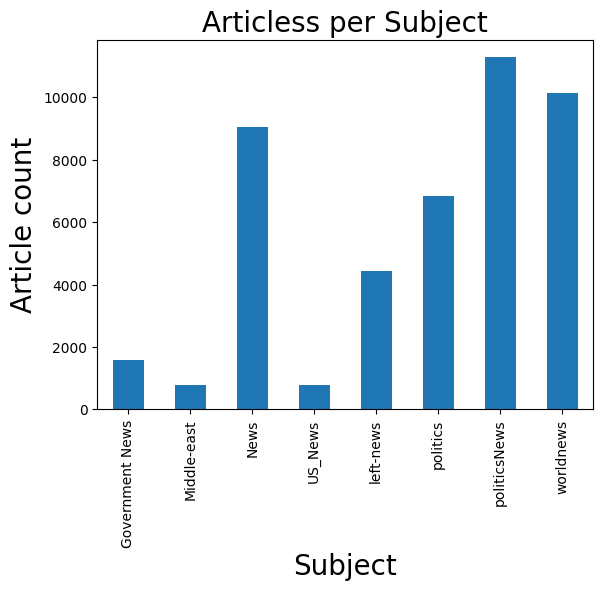

In [16]:
print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.title("Articless per Subject",size=20)
plt.xlabel("Subject",size=20)
plt.ylabel("Article count",size=20)
plt.show()

class
0    23471
1    21407
Name: text, dtype: int64
0 = Fake news
1 = True news


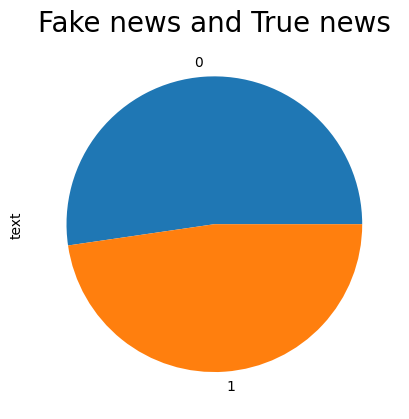

In [17]:
print(data_merge.groupby(['class'])['text'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['class'])['text'].count().plot(kind="pie")
plt.title("Fake news and True news",size=20)
plt.show()

In [18]:
data = data_merge.drop(["title","subject","date"], axis=1)
data.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [19]:
data=data.sample(frac=1)
data.head(10)

,text,class
974,White House counselor Kellyanne Conway likes t...,0
18970,,0
17098,MOGADISHU (Reuters) - Turkey s swift response ...,1
10786,Terrified concert goers fled an Ariana Grande ...,0
23065,21st Century Wire says Now we can see part of...,0
1261,After Donald Trump pulled the United States ou...,0
796,The dominoes continue to fall as new evidence ...,0
8912,WASHINGTON (Reuters) - Seven U.S. senators urg...,1
10406,WASHINGTON (Reuters) - Democratic lawmakers on...,1
13357,"Donald Trump doesn t seem the forgiving type, ...",0


In [20]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [21]:
def filtering(data):
  text=data.lower()
  text=re.sub('\[.*?\]', '', text)
  text=re.sub("\\W"," ",text)
  text=re.sub('https?://\S+|www\.\S+', '', text)
  text=re.sub('<.*?>+', '', text)
  test=re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text=re.sub('\n', '', text)
  text=re.sub('\w*\d\w*', '', text)
  return text

In [22]:
data["text"]=data["text"].apply(filtering)
data.head(10)

,text,class
974,white house counselor kellyanne conway likes t...,0
18970,,0
17098,mogadishu reuters turkey s swift response ...,1
10786,terrified concert goers fled an ariana grande ...,0
23065,century wire says now we can see part of the...,0
1261,after donald trump pulled the united states ou...,0
796,the dominoes continue to fall as new evidence ...,0
8912,washington reuters seven u s senators urg...,1
10406,washington reuters democratic lawmakers on...,1
13357,donald trump doesn t seem the forgiving type ...,0


In [23]:
x=data['text']
y=data['class']

In [25]:
x_train,x__test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'x' is your original list of text documents before any transformations
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x)  # Fit and transform on the original text data
xv_test = vectorization.transform(x__test)  # Transform the test data using the fitted vectorizer

In [35]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the data first
x_train, x_test, y_train, y_test = ttp(x, y, test_size=0.25, random_state=0)

# Then apply TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)  # Fit and transform on the training data
xv_test = vectorization.transform(x_test)  # Transform the test data using the fitted vectorizer

# Model training remains unchanged
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train,y_train)

# Now the prediction should work
pred_lr = LR.predict(xv_test)
LR.score(xv_test, y_test)
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5892
           1       0.99      0.99      0.99      5328

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [45]:
from sklearn.linear_model import LinearRegression
LR  = LinearRegression()

In [46]:
t = [[5],[7],[12],[16],[20]]
m=[40,120,180,210,240]

LR.fit(t,m)

LinearRegression()

In [47]:
LR.predict([[5.5]])

array([78.64935065])

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [51]:
RFC.score(xv_test,y_test)

0.9881461675579323

In [52]:
pred_RFC = RFC.predict(xv_test)

In [53]:
print(classification_report(y_test,pred_RFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5892
           1       0.99      0.99      0.99      5328

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [56]:
DT.score(xv_test,y_test).round(2)

1.0

In [57]:
pred_DT = DT.predict(xv_test)

In [58]:
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5892
           1       1.00      1.00      1.00      5328

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [62]:
def predict_news(text):
  text_vectorized = vectorization.transform([filtering(text)])
  # Initialize and fit a RandomForestClassifier model here if you haven't already
  RF = RandomForestClassifier()
  RF.fit(xv_train, y_train) # Assuming xv_train and y_train are available in scope
  prediction = RF.predict(text_vectorized)
  if prediction == 1:
    return "This news is likely true."
  else:
    return "This news is likely fake."
user_input = input("Enter news text: ")
result = predict_news(user_input)
print(result)

Enter news text: WASHINGTON (Reuters)
This news is likely fake.
